In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!ls "/content/drive/My Drive/"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/housing.csv'
data = pd.read_csv(file_path)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# for total_bedrooms, there are only 20433 non-null counts available
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# dropping non-null values
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
# imported for spliting the data into training and testing
from sklearn.model_selection import train_test_split as tts

# X represents the data we will use to predict the house value
X = data.drop(['median_house_value'], axis = 1)

# y represents the house value our prediction will be compared to
y = data['median_house_value']

In [ ]:
# splitting the data into testing and training
# 20% is used for testing and 80% is used for training
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [ ]:
# combining the train data together
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

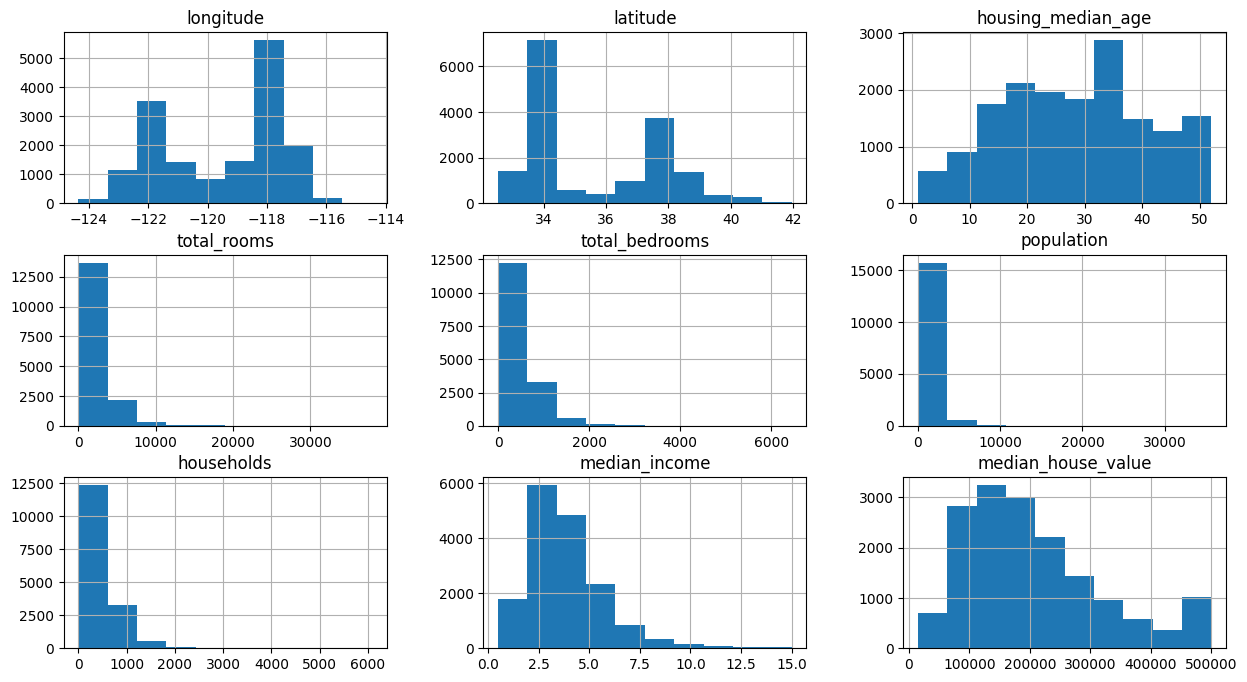

In [ ]:
train_data.hist(figsize=(15,8))

<ipython-input-76-3d3f9063663e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

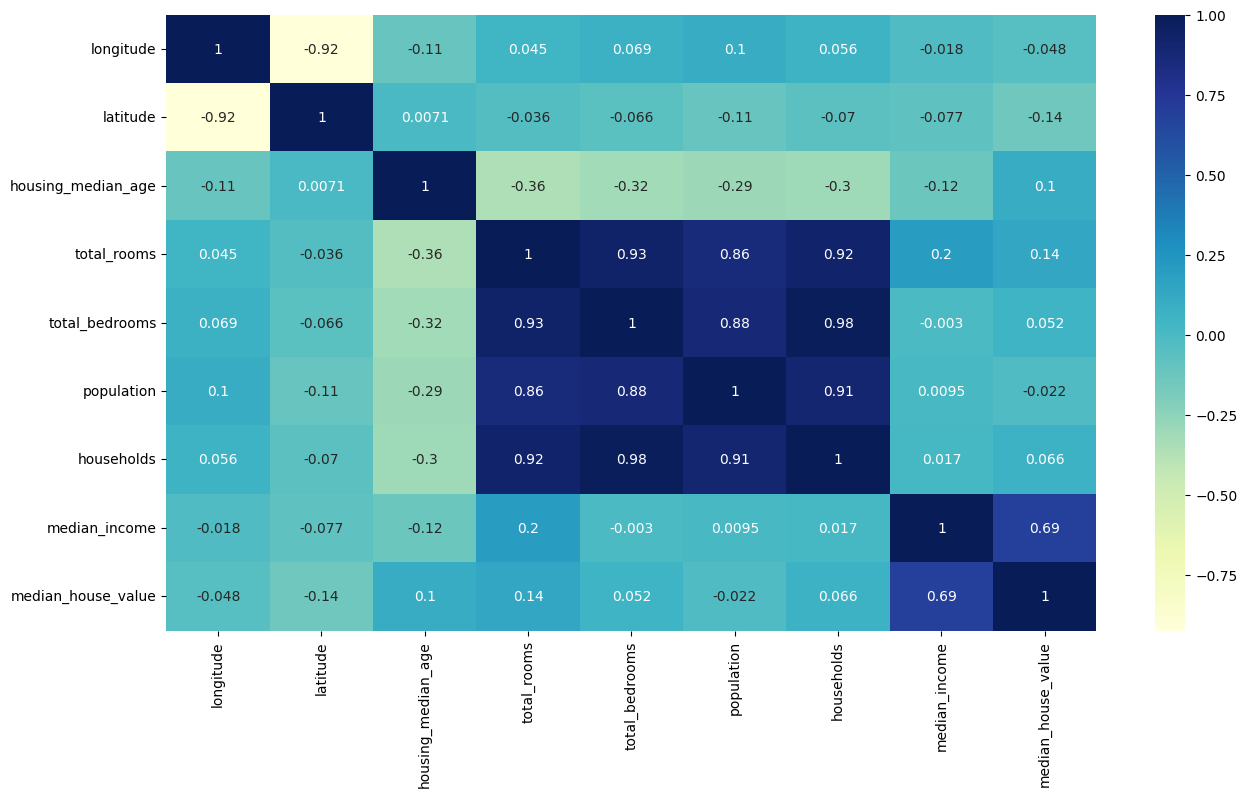

In [ ]:
# plotting a correlation heat map to see how features relate to each other
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
# normalizing the distribution
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

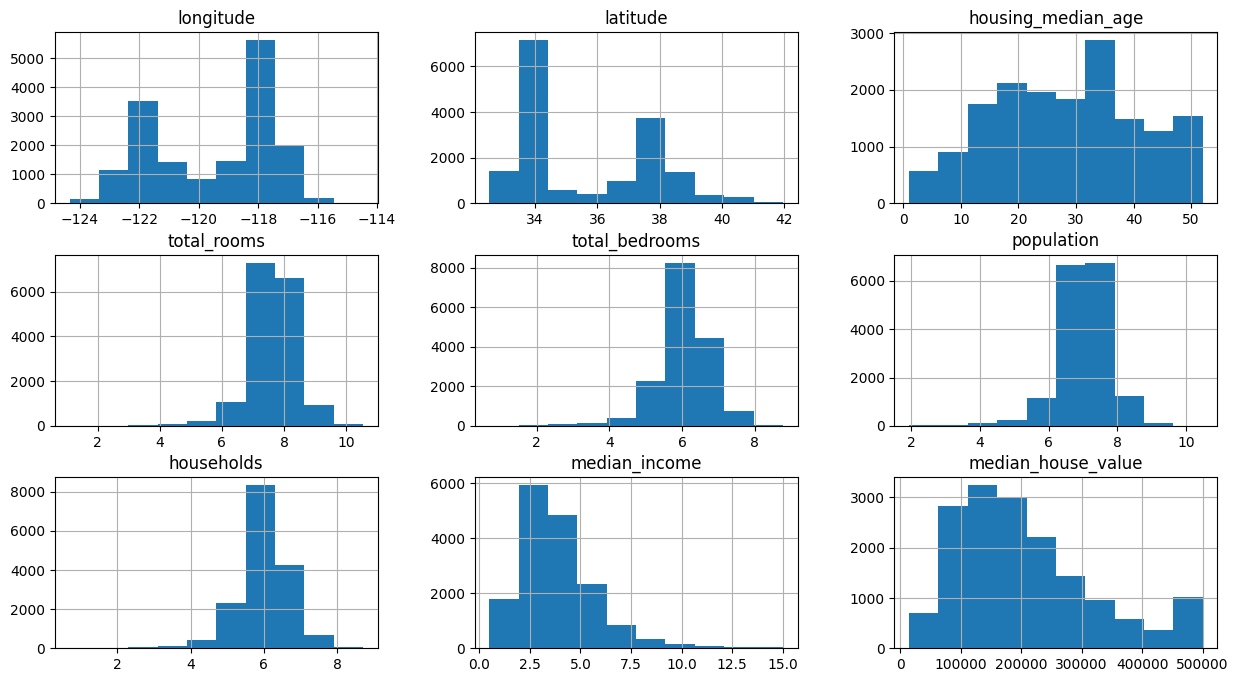

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
# making the ocean_proximity category a numerical value
# making each ocean_proximity value into its one column and then making that either 1 or 0 (yes or no)
train_data.ocean_proximity.value_counts()
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10214,-117.90,33.87,28.0,7.747597,6.289716,7.215975,6.224558,2.9861,218600.0,1,0,0,0,0
1253,-122.01,39.21,50.0,7.373374,5.921578,6.661855,5.730100,2.2679,69100.0,0,1,0,0,0
7227,-118.16,34.01,37.0,6.538140,5.568345,6.859615,5.545177,1.6354,158900.0,1,0,0,0,0
7230,-118.14,34.02,44.0,7.447751,6.133398,7.462215,6.049733,2.7019,153300.0,1,0,0,0,0
12351,-116.52,33.81,12.0,9.425210,7.845024,7.843456,7.143618,3.4394,162200.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,-118.98,35.35,21.0,6.208590,4.882802,6.238325,4.828314,1.7614,33200.0,0,1,0,0,0
6843,-118.13,34.07,20.0,7.664347,6.484635,7.534228,6.361302,2.3664,192200.0,1,0,0,0,0
8775,-118.31,33.80,29.0,7.935945,6.350886,7.293018,6.324359,3.7167,308900.0,1,0,0,0,0
16205,-121.29,37.94,40.0,7.947325,6.486161,7.619724,6.354370,2.0303,63800.0,0,1,0,0,0


<Axes: >

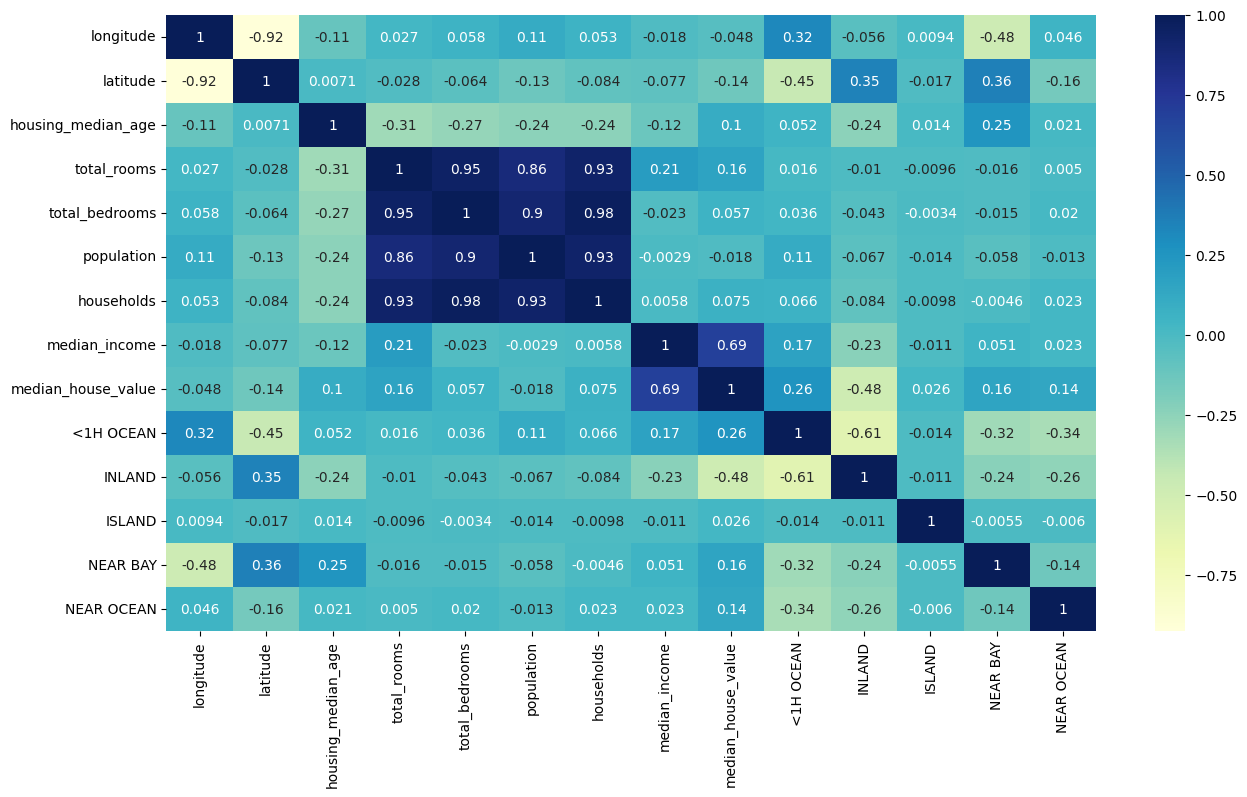

In [ ]:
# plotting a correlation heat map to see how features relate to each other with ocean proximities
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

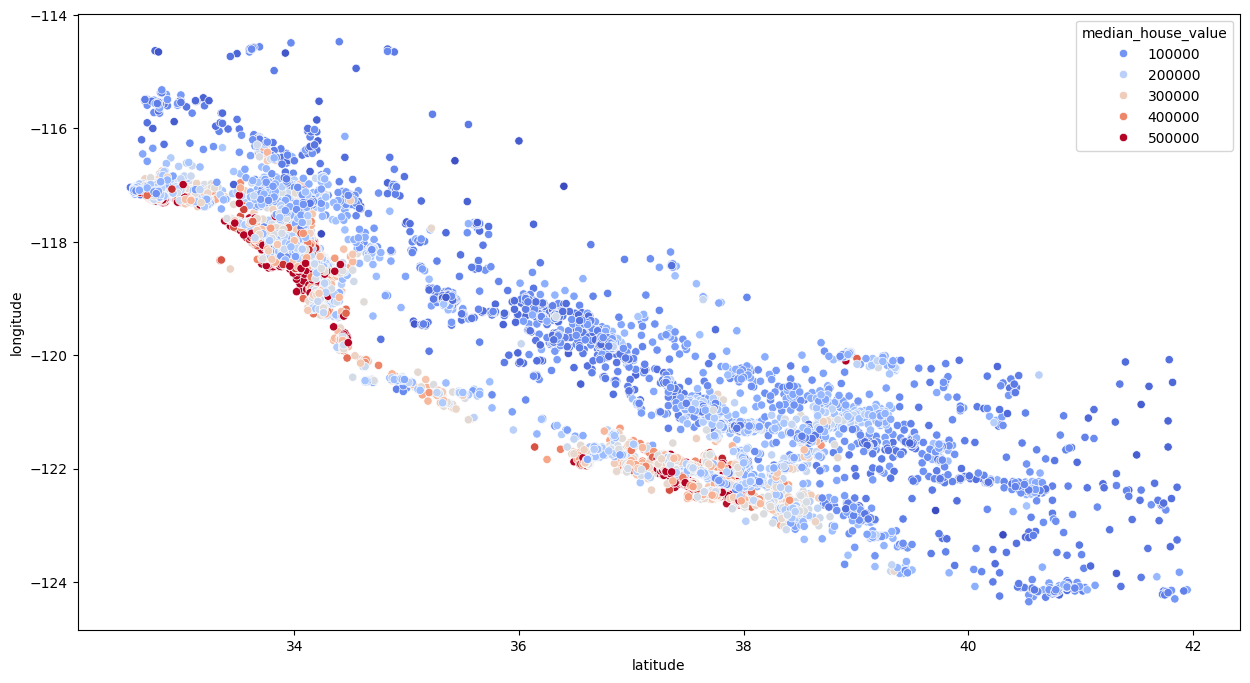

In [ ]:
# visualize the coordinates correlation to the median house value
# closer to the coast = higher values
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue="median_house_value", palette="coolwarm")

<Axes: >

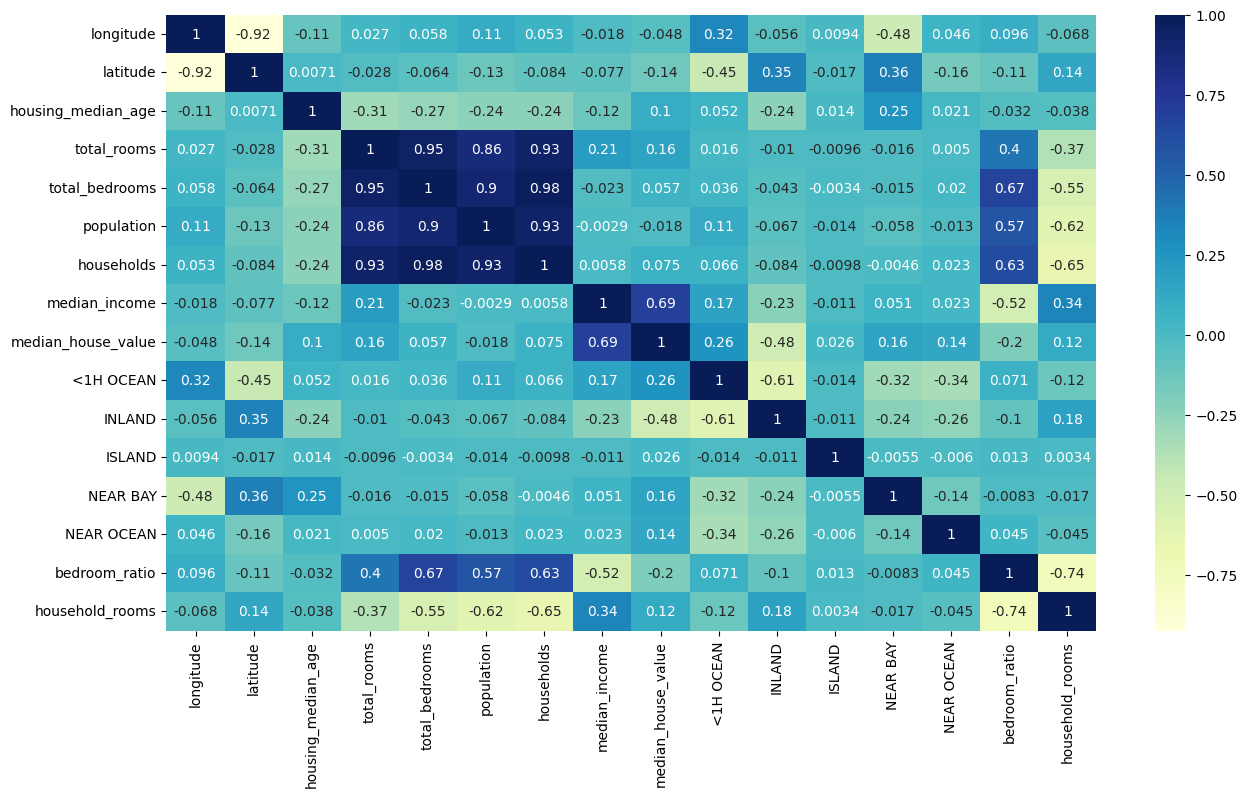

In [ ]:
# feature engineering

"""
totalRooms: Total number of rooms within a block
totalBedrooms: Total number of bedrooms within a block
households: Total number of households, a group of people residing within a home unit, for a block
"""

# the following feature is a ratio of bedroom to rooms
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

# the following feature is a ratio of rooms to household
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
# training a linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = LinearRegression()

"""
X_train represents all of the other data, besides house value, which will be used to predict the median house value
y_train represents the median house value
"""
X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

# scaling the input
X_train_s = scaler.fit_transform(X_train)

reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
def testingModel_reg(X_test, y_test):
  test_data = X_test.join(y_test)



  test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
  test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
  test_data['population'] = np.log(test_data['population'] + 1)
  test_data['households'] = np.log(test_data['households'] + 1)

  test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

  # the following feature is a ratio of bedroom to rooms
  test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']

  # the following feature is a ratio of rooms to household
  test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

  X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

  # scaling the test data
  X_test_s = scaler.transform(X_test)

  return reg.score(X_test_s, y_test)



In [ ]:
# how well the regression model fits the data and how accurate its predictions are

testingModel_reg(X_test, y_test)

0.6687841252630357

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

def testingModel_forest(X_test, y_test):

  test_data = X_test.join(y_test)

  test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
  test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
  test_data['population'] = np.log(test_data['population'] + 1)
  test_data['households'] = np.log(test_data['households'] + 1)

  test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

  # the following feature is a ratio of bedroom to rooms
  test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']

  # the following feature is a ratio of rooms to household
  test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

  X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

  # scaling the test data
  X_test_s = scaler.transform(X_test)

  return forest.score(X_test_s, y_test)




In [ ]:
# how well the regression model fits the data and how accurate its predictions are
testingModel_forest(X_test, y_test)

0.8196320097638823

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True
                           )

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# used to find the optimal hyperparameters for higher accuracy
# if it doesnt mention the parameter, then it is using the default value
best_forest = grid_search.best_estimator_

In [ ]:
def testingModel_fineTuned_forest(X_test, y_test):

  test_data = X_test.join(y_test)

  test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
  test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
  test_data['population'] = np.log(test_data['population'] + 1)
  test_data['households'] = np.log(test_data['households'] + 1)

  test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

  # the following feature is a ratio of bedroom to rooms
  test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']

  # the following feature is a ratio of rooms to household
  test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

  X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

  # scaling the test data
  X_test_s = scaler.transform(X_test)

  best_forest = grid_search.best_estimator_

  return best_forest.score(X_test_s, y_test)


In [ ]:
# sometimes hypertuning the parameters can make the accuracy worse
testingModel_fineTuned_forest(X_test, y_test)

0.8205503685866531